
# Title

### Auto Categorizing News Article based on the Content

# Introduction

### Name : Sonny Riadi


`Project Description :`

In this project we gonna make a text classification using Natural Language Processing to determine the category of the article. 


# External Link

1. Github
2. Deployment


# Working Area
This is where you handle the task


###  I. Import Library

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import ast
import re
import matplotlib.pyplot as plt

# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# label encoder
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Tokenizer
from keras.preprocessing.text import Tokenizer

# Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# splitting Dataset
from sklearn.model_selection import train_test_split

#tf
import tensorflow as tf

# modelling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

# save model
import pickle

# disable warning
import warnings
warnings.filterwarnings("ignore")

### II. Loading Dataset

In [2]:
df = pd.read_csv('Dataset/final data.csv')
df.head(10)

,Unnamed: 0,viewers_id,content_id,hit_timestamp,user_type,category_id,tagging,creator_id,category_name,viewers_birthdate,viewers_gender,viewers_region
0,0,UN-RY8dNmQ,OC0RuX,2022-07-30,Anonymus User,23.0,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",99jY83,Hiburan,NaN,NaN,NaN
1,1,UN-RY8dNmQ,OC0RuX,2022-07-30,Anonymus User,23.0,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",99jY83,Hiburan,NaN,NaN,NaN
2,2,UN-b1g5Cc6,EsWkCd,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",99jY83,Hiburan,NaN,NaN,NaN
3,3,UN-b1g5Cc6,EsWkCd,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",99jY83,Hiburan,NaN,NaN,NaN
4,4,UN-kNqX0xJ,WMKZwi,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""MSDG2f"", ""tag_name"": ""valencia-ta...",99jY83,Hiburan,NaN,NaN,NaN
5,5,UN-aT1jBga,WMKZwi,2022-08-13,Anonymus User,23.0,"[{""tag_id"": ""MSDG2f"", ""tag_name"": ""valencia-ta...",99jY83,Hiburan,NaN,NaN,NaN
6,6,UN-kNqX0xJ,gtFp7N,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""rQn4Gq"", ""tag_name"": ""raffi-ahmad...",99jY83,Hiburan,NaN,NaN,NaN
7,7,UN-aT1jBga,gtFp7N,2022-08-13,Anonymus User,23.0,"[{""tag_id"": ""rQn4Gq"", ""tag_name"": ""raffi-ahmad...",99jY83,Hiburan,NaN,NaN,NaN
8,8,UN-b1g5Cc6,7pnFpi,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""A7hdu3"", ""tag_name"": ""artis-indon...",39jZ33,Hiburan,NaN,NaN,NaN
9,9,UN-3FmVfg0,7pnFpi,2022-09-15,Anonymus User,23.0,"[{""tag_id"": ""A7hdu3"", ""tag_name"": ""artis-indon...",39jZ33,Hiburan,NaN,NaN,NaN


dataset information :

- viewers_id: contained information about viewers_id. There are several ids using UN- and using dynamic number generated
- content_id: contained information about content_id. The ids are using dynamic number generated
- hit_timestamp: contained information describes the time viewers carry out the process of reading per one article
- user_type: describe user type based on registered user and anonymous user or unregistered
- category_id: contained information about category_id. The ids are using dynamic number generated
- tagging: describe the tagging per content_id
- creator_id: describe content owner
- category_name: describe the category name
- viewers_birthdate: describe the birthdate of viewers
- viewers_gender: describe the gender of viewers
- viewers_region: describe the region of viewers


In [3]:
df.shape

(958547, 12)

### III. Data Cleaning & Preparation

##### 1. Remove Uneeded Column

In [4]:
df.drop(columns=[df.columns[0],'viewers_id','user_type','creator_id','viewers_birthdate','viewers_gender','viewers_region'],inplace=True)
df.head(10)

,content_id,hit_timestamp,category_id,tagging,category_name
0,OC0RuX,2022-07-30,23.0,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",Hiburan
1,OC0RuX,2022-07-30,23.0,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",Hiburan
2,EsWkCd,2022-07-31,23.0,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",Hiburan
3,EsWkCd,2022-07-31,23.0,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",Hiburan
4,WMKZwi,2022-07-31,23.0,"[{""tag_id"": ""MSDG2f"", ""tag_name"": ""valencia-ta...",Hiburan
5,WMKZwi,2022-08-13,23.0,"[{""tag_id"": ""MSDG2f"", ""tag_name"": ""valencia-ta...",Hiburan
6,gtFp7N,2022-07-31,23.0,"[{""tag_id"": ""rQn4Gq"", ""tag_name"": ""raffi-ahmad...",Hiburan
7,gtFp7N,2022-08-13,23.0,"[{""tag_id"": ""rQn4Gq"", ""tag_name"": ""raffi-ahmad...",Hiburan
8,7pnFpi,2022-07-31,23.0,"[{""tag_id"": ""A7hdu3"", ""tag_name"": ""artis-indon...",Hiburan
9,7pnFpi,2022-09-15,23.0,"[{""tag_id"": ""A7hdu3"", ""tag_name"": ""artis-indon...",Hiburan


##### 2. Remove Duplicates Content ID

In [5]:
df.drop_duplicates(subset='content_id',inplace=True)
df.head(10)

,content_id,hit_timestamp,category_id,tagging,category_name
0,OC0RuX,2022-07-30,23.0,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",Hiburan
2,EsWkCd,2022-07-31,23.0,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",Hiburan
4,WMKZwi,2022-07-31,23.0,"[{""tag_id"": ""MSDG2f"", ""tag_name"": ""valencia-ta...",Hiburan
6,gtFp7N,2022-07-31,23.0,"[{""tag_id"": ""rQn4Gq"", ""tag_name"": ""raffi-ahmad...",Hiburan
8,7pnFpi,2022-07-31,23.0,"[{""tag_id"": ""A7hdu3"", ""tag_name"": ""artis-indon...",Hiburan
17,eoMyNm,2022-08-13,23.0,"[{""tag_id"": ""OoH9nc"", ""tag_name"": ""komnas-ham""...",Hiburan
115,lDC3Tt,2022-08-13,23.0,"[{""tag_id"": ""vcUnig"", ""tag_name"": ""putri-candr...",Hiburan
160,PMIJf3,2022-08-13,23.0,"[{""tag_id"": ""fyAvcD"", ""tag_name"": ""bareskrim"",...",Hiburan
194,xPGwsq,2022-08-13,23.0,"[{""tag_id"": ""xsbNux"", ""tag_name"": ""film barat""...",Hiburan
198,EZ8Or1,2022-08-13,23.0,"[{""tag_id"": ""28hLZ4"", ""tag_name"": ""bioskop"", ""...",Hiburan


##### 3. Drop Missing Values

In [6]:
df.dropna(inplace=True)

In [7]:
df.reset_index(drop=True,inplace=True)
df.head(10)

,content_id,hit_timestamp,category_id,tagging,category_name
0,OC0RuX,2022-07-30,23.0,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",Hiburan
1,EsWkCd,2022-07-31,23.0,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",Hiburan
2,WMKZwi,2022-07-31,23.0,"[{""tag_id"": ""MSDG2f"", ""tag_name"": ""valencia-ta...",Hiburan
3,gtFp7N,2022-07-31,23.0,"[{""tag_id"": ""rQn4Gq"", ""tag_name"": ""raffi-ahmad...",Hiburan
4,7pnFpi,2022-07-31,23.0,"[{""tag_id"": ""A7hdu3"", ""tag_name"": ""artis-indon...",Hiburan
5,eoMyNm,2022-08-13,23.0,"[{""tag_id"": ""OoH9nc"", ""tag_name"": ""komnas-ham""...",Hiburan
6,lDC3Tt,2022-08-13,23.0,"[{""tag_id"": ""vcUnig"", ""tag_name"": ""putri-candr...",Hiburan
7,PMIJf3,2022-08-13,23.0,"[{""tag_id"": ""fyAvcD"", ""tag_name"": ""bareskrim"",...",Hiburan
8,xPGwsq,2022-08-13,23.0,"[{""tag_id"": ""xsbNux"", ""tag_name"": ""film barat""...",Hiburan
9,EZ8Or1,2022-08-13,23.0,"[{""tag_id"": ""28hLZ4"", ""tag_name"": ""bioskop"", ""...",Hiburan


##### 4. Create new tag column

In [8]:
df['tagging'] = df['tagging'].apply(lambda x: ast.literal_eval(x))

In [9]:
def separate_tagging(tagging):
    list_tag = []
    for j in tagging:
        list_tag.append(j['tag_name'])
    return list_tag

In [10]:
df['new_tag'] = df['tagging'].apply(lambda x : separate_tagging(x))

In [11]:
df.head(10)

,content_id,hit_timestamp,category_id,tagging,category_name,new_tag
0,OC0RuX,2022-07-30,23.0,"[{'tag_id': 'l33saH', 'tag_name': 'nathalie-ho...",Hiburan,"[nathalie-holscher, sidang-cerai-nathalie-hols..."
1,EsWkCd,2022-07-31,23.0,"[{'tag_id': 'Tw9Th4', 'tag_name': 'deddy-corbu...",Hiburan,"[deddy-corbuzier, vicky-prasetyo, kekayaan-ded..."
2,WMKZwi,2022-07-31,23.0,"[{'tag_id': 'MSDG2f', 'tag_name': 'valencia-ta...",Hiburan,"[valencia-tanoesoedibjo, indonesian-comedy-awa..."
3,gtFp7N,2022-07-31,23.0,"[{'tag_id': 'rQn4Gq', 'tag_name': 'raffi-ahmad...",Hiburan,"[raffi-ahmad, parto-patrio, lomba-menembak-pas..."
4,7pnFpi,2022-07-31,23.0,"[{'tag_id': 'A7hdu3', 'tag_name': 'artis-indon...",Hiburan,"[artis-indonesia-mirip-bintang-bollywood, arti..."
5,eoMyNm,2022-08-13,23.0,"[{'tag_id': 'OoH9nc', 'tag_name': 'komnas-ham'...",Hiburan,"[komnas-ham, putri-candrawathi, irjen-ferdy-sa..."
6,lDC3Tt,2022-08-13,23.0,"[{'tag_id': 'vcUnig', 'tag_name': 'putri-candr...",Hiburan,"[putri-candrawathi, irjen-ferdy-sambo, ferdy-s..."
7,PMIJf3,2022-08-13,23.0,"[{'tag_id': 'fyAvcD', 'tag_name': 'bareskrim',...",Hiburan,"[bareskrim, istri, ferry-mursyidan-baldan, ter..."
8,xPGwsq,2022-08-13,23.0,"[{'tag_id': 'xsbNux', 'tag_name': 'film barat'...",Hiburan,"[film barat, adegan film, film sadis]"
9,EZ8Or1,2022-08-13,23.0,"[{'tag_id': '28hLZ4', 'tag_name': 'bioskop', '...",Hiburan,"[bioskop, film jepang, sensor, erotis, film sa..."


##### 5. Select Category

in this project we only use 5 category, for future development it's better if all category included

In [12]:
df = df[
        (df['category_name'].isin(['Musik dan Film','Kesehatan','Games','Teknologi','Ekonomi']))
        
    ]
df

,content_id,hit_timestamp,category_id,tagging,category_name,new_tag
14173,EouKmq,2022-08-13,35.0,"[{'tag_id': '729Rwo', 'tag_name': 'meta', 'tag...",Teknologi,"[meta, media-sosial, facebook, instagram, keam..."
14174,2iL50a,2022-08-13,35.0,"[{'tag_id': '0lClAQ', 'tag_name': 'hari-pramuk...",Teknologi,"[hari-pramuka-2022, twibbon-hari-pramuka-2022,..."
14175,56eda37164824b8c9294746d730bce18,2022-08-13,35.0,"[{'tag_id': 'B3yGbZ', 'tag_name': 'metaverse',...",Teknologi,"[metaverse, japan, tokyo]"
14176,y4Hckz,2022-08-13,35.0,"[{'tag_id': '729Rwo', 'tag_name': 'meta', 'tag...",Teknologi,"[meta, instagram, inewssidoarjoid, kartu, kart..."
14177,DzT8Zc,2022-08-13,35.0,"[{'tag_id': 'wMbu2j', 'tag_name': 'whatsapp', ...",Teknologi,"[whatsapp, aplikasi, fitur-whatsapp, fitur, st..."
...,...,...,...,...,...,...
17883,9wOYrk,2022-08-12,36.0,"[{'tag_id': 'm6g300', 'tag_name': 'kakegurui',...",Games,"[kakegurui, kakeguruitwin]"
17884,LEaIrf,2022-08-13,36.0,"[{'tag_id': '5u5MEQ', 'tag_name': 'steam', 'ta...",Games,"[steam, steamdeck]"
17885,uHerXy,2022-08-13,36.0,"[{'tag_id': 'POaFLZ', 'tag_name': 'anime', 'ta...",Games,"[anime, rekomendasi anime, attack on titan, ju..."
17886,wmt1Ia,2022-08-13,36.0,"[{'tag_id': 'OqY9hp', 'tag_name': 'mobilelegen...",Games,"[mobilelegends, mpl, evos, geekfam, bren, duck..."


##### 5. Add More Content

In [13]:
def scrap_title(content_id):
    try:
        url = f"https://buddyku.com/api/content/detail?content_id={content_id}"
        response = requests.get(url).content
        content = json.loads(response)
        title = content['values'][0]['content_title']
        return title
    except: 
        pass


def scrap_content(content_id):
    try:
        url = f"https://buddyku.com/api/content/detail?content_id={content_id}"
        response = requests.get(url).content
        content = json.loads(response)
        title = content['values'][0]['content']
        return title
    except: 
        pass


In [14]:
df['content'] = df['content_id'].apply(lambda x: scrap_content(x))

In [15]:
df.head(10)

,content_id,hit_timestamp,category_id,tagging,category_name,new_tag,content
14173,EouKmq,2022-08-13,35.0,"[{'tag_id': '729Rwo', 'tag_name': 'meta', 'tag...",Teknologi,"[meta, media-sosial, facebook, instagram, keam...",<p><strong>JAKARTA</strong> - Seorang mantan ...
14174,2iL50a,2022-08-13,35.0,"[{'tag_id': '0lClAQ', 'tag_name': 'hari-pramuk...",Teknologi,"[hari-pramuka-2022, twibbon-hari-pramuka-2022,...",<p>Berikut adalah 15 link twibbon bingkai ucap...
14175,56eda37164824b8c9294746d730bce18,2022-08-13,35.0,"[{'tag_id': 'B3yGbZ', 'tag_name': 'metaverse',...",Teknologi,"[metaverse, japan, tokyo]","<p><br></p><p>Universitas ternama Tokyo, Unive..."
14176,y4Hckz,2022-08-13,35.0,"[{'tag_id': '729Rwo', 'tag_name': 'meta', 'tag...",Teknologi,"[meta, instagram, inewssidoarjoid, kartu, kart...","<p>JAKARTA, iNewsSidoarjo.id- Seorang mantan i..."
14177,DzT8Zc,2022-08-13,35.0,"[{'tag_id': 'wMbu2j', 'tag_name': 'whatsapp', ...",Teknologi,"[whatsapp, aplikasi, fitur-whatsapp, fitur, st...","<p style=""text-align:justify""><strong>BATU, iN..."
14178,69648bdcc5c3436d933d02177705bae8,2022-08-13,35.0,"[{'tag_id': 'cZQ0qL', 'tag_name': 'smartphone'...",Teknologi,"[smartphone, vivox80, gawaiterbaru]",<p>Kecanggihan tekhnologi masa kini memang tid...
14179,gMCkZ7,2022-08-13,35.0,"[{'tag_id': '729Rwo', 'tag_name': 'meta', 'tag...",Teknologi,"[meta, google, felix-krause]","<p><strong>JAKARTA, iNews.id</strong>- Seorang..."
14180,nxDTKR,2022-08-13,35.0,"[{'tag_id': 'wMbu2j', 'tag_name': 'whatsapp', ...",Teknologi,"[whatsapp, aplikasi, chat, fitur-privasi]","<p style=""text-align:justify""><strong>BATU, iN..."
14181,ADTLE5,2022-08-13,35.0,"[{'tag_id': 'wMbu2j', 'tag_name': 'whatsapp', ...",Teknologi,"[whatsapp, fitur-whatsapp, fitur-baru-whatsapp...","<p><strong>JAKARTA, celebrities.id </strong>- ..."
14182,f945fa19fbb1430aa1e3194114f310b6,2022-08-13,35.0,"[{'tag_id': 'ijaAWH', 'tag_name': 'motorola', ...",Teknologi,"[motorola, moto_razr, berita_gadget, smartphon...",<b>VNews - </b>Setelah sebelumnya dijadwalkan ...


In [16]:
df.to_csv('dataset_new.csv',index=False)

In [51]:
df = pd.read_csv('dataset_new.csv')
df['new_tag'] = df['new_tag'].apply(lambda x: ast.literal_eval(x))

In [52]:
df

,content_id,hit_timestamp,category_id,tagging,category_name,new_tag,content
0,EouKmq,2022-08-13,35.0,"[{'tag_id': '729Rwo', 'tag_name': 'meta', 'tag...",Teknologi,"[meta, media-sosial, facebook, instagram, keam...",<p><strong>JAKARTA</strong> - Seorang mantan ...
1,2iL50a,2022-08-13,35.0,"[{'tag_id': '0lClAQ', 'tag_name': 'hari-pramuk...",Teknologi,"[hari-pramuka-2022, twibbon-hari-pramuka-2022,...",<p>Berikut adalah 15 link twibbon bingkai ucap...
2,56eda37164824b8c9294746d730bce18,2022-08-13,35.0,"[{'tag_id': 'B3yGbZ', 'tag_name': 'metaverse',...",Teknologi,"[metaverse, japan, tokyo]","<p><br></p><p>Universitas ternama Tokyo, Unive..."
3,y4Hckz,2022-08-13,35.0,"[{'tag_id': '729Rwo', 'tag_name': 'meta', 'tag...",Teknologi,"[meta, instagram, inewssidoarjoid, kartu, kart...","<p>JAKARTA, iNewsSidoarjo.id- Seorang mantan i..."
4,DzT8Zc,2022-08-13,35.0,"[{'tag_id': 'wMbu2j', 'tag_name': 'whatsapp', ...",Teknologi,"[whatsapp, aplikasi, fitur-whatsapp, fitur, st...","<p style=""text-align:justify""><strong>BATU, iN..."
...,...,...,...,...,...,...,...
2282,9wOYrk,2022-08-12,36.0,"[{'tag_id': 'm6g300', 'tag_name': 'kakegurui',...",Games,"[kakegurui, kakeguruitwin]","<p>Judi itu sudah jelas haram. Namun, menonton..."
2283,LEaIrf,2022-08-13,36.0,"[{'tag_id': '5u5MEQ', 'tag_name': 'steam', 'ta...",Games,"[steam, steamdeck]",<p>Tak terasa <strong>Steam Deck</strong> seba...
2284,uHerXy,2022-08-13,36.0,"[{'tag_id': 'POaFLZ', 'tag_name': 'anime', 'ta...",Games,"[anime, rekomendasi anime, attack on titan, ju...",<p><strong>Anime</strong> <em>dark fantasy</em...
2285,wmt1Ia,2022-08-13,36.0,"[{'tag_id': 'OqY9hp', 'tag_name': 'mobilelegen...",Games,"[mobilelegends, mpl, evos, geekfam, bren, duck...",<p>Serbuan pemain asing Filipina atau PH ke MP...


In [53]:
df

,content_id,hit_timestamp,category_id,tagging,category_name,new_tag,content
0,EouKmq,2022-08-13,35.0,"[{'tag_id': '729Rwo', 'tag_name': 'meta', 'tag...",Teknologi,"[meta, media-sosial, facebook, instagram, keam...",<p><strong>JAKARTA</strong> - Seorang mantan ...
1,2iL50a,2022-08-13,35.0,"[{'tag_id': '0lClAQ', 'tag_name': 'hari-pramuk...",Teknologi,"[hari-pramuka-2022, twibbon-hari-pramuka-2022,...",<p>Berikut adalah 15 link twibbon bingkai ucap...
2,56eda37164824b8c9294746d730bce18,2022-08-13,35.0,"[{'tag_id': 'B3yGbZ', 'tag_name': 'metaverse',...",Teknologi,"[metaverse, japan, tokyo]","<p><br></p><p>Universitas ternama Tokyo, Unive..."
3,y4Hckz,2022-08-13,35.0,"[{'tag_id': '729Rwo', 'tag_name': 'meta', 'tag...",Teknologi,"[meta, instagram, inewssidoarjoid, kartu, kart...","<p>JAKARTA, iNewsSidoarjo.id- Seorang mantan i..."
4,DzT8Zc,2022-08-13,35.0,"[{'tag_id': 'wMbu2j', 'tag_name': 'whatsapp', ...",Teknologi,"[whatsapp, aplikasi, fitur-whatsapp, fitur, st...","<p style=""text-align:justify""><strong>BATU, iN..."
...,...,...,...,...,...,...,...
2282,9wOYrk,2022-08-12,36.0,"[{'tag_id': 'm6g300', 'tag_name': 'kakegurui',...",Games,"[kakegurui, kakeguruitwin]","<p>Judi itu sudah jelas haram. Namun, menonton..."
2283,LEaIrf,2022-08-13,36.0,"[{'tag_id': '5u5MEQ', 'tag_name': 'steam', 'ta...",Games,"[steam, steamdeck]",<p>Tak terasa <strong>Steam Deck</strong> seba...
2284,uHerXy,2022-08-13,36.0,"[{'tag_id': 'POaFLZ', 'tag_name': 'anime', 'ta...",Games,"[anime, rekomendasi anime, attack on titan, ju...",<p><strong>Anime</strong> <em>dark fantasy</em...
2285,wmt1Ia,2022-08-13,36.0,"[{'tag_id': 'OqY9hp', 'tag_name': 'mobilelegen...",Games,"[mobilelegends, mpl, evos, geekfam, bren, duck...",<p>Serbuan pemain asing Filipina atau PH ke MP...


In [54]:
df.dropna(inplace=True)
df.head(10)

,content_id,hit_timestamp,category_id,tagging,category_name,new_tag,content
0,EouKmq,2022-08-13,35.0,"[{'tag_id': '729Rwo', 'tag_name': 'meta', 'tag...",Teknologi,"[meta, media-sosial, facebook, instagram, keam...",<p><strong>JAKARTA</strong> - Seorang mantan ...
1,2iL50a,2022-08-13,35.0,"[{'tag_id': '0lClAQ', 'tag_name': 'hari-pramuk...",Teknologi,"[hari-pramuka-2022, twibbon-hari-pramuka-2022,...",<p>Berikut adalah 15 link twibbon bingkai ucap...
2,56eda37164824b8c9294746d730bce18,2022-08-13,35.0,"[{'tag_id': 'B3yGbZ', 'tag_name': 'metaverse',...",Teknologi,"[metaverse, japan, tokyo]","<p><br></p><p>Universitas ternama Tokyo, Unive..."
3,y4Hckz,2022-08-13,35.0,"[{'tag_id': '729Rwo', 'tag_name': 'meta', 'tag...",Teknologi,"[meta, instagram, inewssidoarjoid, kartu, kart...","<p>JAKARTA, iNewsSidoarjo.id- Seorang mantan i..."
4,DzT8Zc,2022-08-13,35.0,"[{'tag_id': 'wMbu2j', 'tag_name': 'whatsapp', ...",Teknologi,"[whatsapp, aplikasi, fitur-whatsapp, fitur, st...","<p style=""text-align:justify""><strong>BATU, iN..."
5,69648bdcc5c3436d933d02177705bae8,2022-08-13,35.0,"[{'tag_id': 'cZQ0qL', 'tag_name': 'smartphone'...",Teknologi,"[smartphone, vivox80, gawaiterbaru]",<p>Kecanggihan tekhnologi masa kini memang tid...
6,gMCkZ7,2022-08-13,35.0,"[{'tag_id': '729Rwo', 'tag_name': 'meta', 'tag...",Teknologi,"[meta, google, felix-krause]","<p><strong>JAKARTA, iNews.id</strong>- Seorang..."
7,nxDTKR,2022-08-13,35.0,"[{'tag_id': 'wMbu2j', 'tag_name': 'whatsapp', ...",Teknologi,"[whatsapp, aplikasi, chat, fitur-privasi]","<p style=""text-align:justify""><strong>BATU, iN..."
8,ADTLE5,2022-08-13,35.0,"[{'tag_id': 'wMbu2j', 'tag_name': 'whatsapp', ...",Teknologi,"[whatsapp, fitur-whatsapp, fitur-baru-whatsapp...","<p><strong>JAKARTA, celebrities.id </strong>- ..."
9,f945fa19fbb1430aa1e3194114f310b6,2022-08-13,35.0,"[{'tag_id': 'ijaAWH', 'tag_name': 'motorola', ...",Teknologi,"[motorola, moto_razr, berita_gadget, smartphon...",<b>VNews - </b>Setelah sebelumnya dijadwalkan ...


##### 6. Data Cleansing

In [55]:
def clean_text(text):
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub('[^a-zA-Z]',' ',text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [56]:
df['content_clean'] = df['content'].apply(lambda x: clean_text(x))
df.head(10)

,content_id,hit_timestamp,category_id,tagging,category_name,new_tag,content,content_clean
0,EouKmq,2022-08-13,35.0,"[{'tag_id': '729Rwo', 'tag_name': 'meta', 'tag...",Teknologi,"[meta, media-sosial, facebook, instagram, keam...",<p><strong>JAKARTA</strong> - Seorang mantan ...,jakarta seorang mantan insinyur google felix k...
1,2iL50a,2022-08-13,35.0,"[{'tag_id': '0lClAQ', 'tag_name': 'hari-pramuk...",Teknologi,"[hari-pramuka-2022, twibbon-hari-pramuka-2022,...",<p>Berikut adalah 15 link twibbon bingkai ucap...,berikut adalah link twibbon bingkai ucapan har...
2,56eda37164824b8c9294746d730bce18,2022-08-13,35.0,"[{'tag_id': 'B3yGbZ', 'tag_name': 'metaverse',...",Teknologi,"[metaverse, japan, tokyo]","<p><br></p><p>Universitas ternama Tokyo, Unive...",universitas ternama tokyo university of tokyo ...
3,y4Hckz,2022-08-13,35.0,"[{'tag_id': '729Rwo', 'tag_name': 'meta', 'tag...",Teknologi,"[meta, instagram, inewssidoarjoid, kartu, kart...","<p>JAKARTA, iNewsSidoarjo.id- Seorang mantan i...",jakarta inewssidoarjo id seorang mantan insiny...
4,DzT8Zc,2022-08-13,35.0,"[{'tag_id': 'wMbu2j', 'tag_name': 'whatsapp', ...",Teknologi,"[whatsapp, aplikasi, fitur-whatsapp, fitur, st...","<p style=""text-align:justify""><strong>BATU, iN...",batu inews id status online di whatsapp memper...
5,69648bdcc5c3436d933d02177705bae8,2022-08-13,35.0,"[{'tag_id': 'cZQ0qL', 'tag_name': 'smartphone'...",Teknologi,"[smartphone, vivox80, gawaiterbaru]",<p>Kecanggihan tekhnologi masa kini memang tid...,kecanggihan tekhnologi masa kini memang tidak ...
6,gMCkZ7,2022-08-13,35.0,"[{'tag_id': '729Rwo', 'tag_name': 'meta', 'tag...",Teknologi,"[meta, google, felix-krause]","<p><strong>JAKARTA, iNews.id</strong>- Seorang...",jakarta inews id seorang mantan insinyur googl...
7,nxDTKR,2022-08-13,35.0,"[{'tag_id': 'wMbu2j', 'tag_name': 'whatsapp', ...",Teknologi,"[whatsapp, aplikasi, chat, fitur-privasi]","<p style=""text-align:justify""><strong>BATU, iN...",batu inews id pemakai whatsapp umumnya mengamb...
8,ADTLE5,2022-08-13,35.0,"[{'tag_id': 'wMbu2j', 'tag_name': 'whatsapp', ...",Teknologi,"[whatsapp, fitur-whatsapp, fitur-baru-whatsapp...","<p><strong>JAKARTA, celebrities.id </strong>- ...",jakarta celebrities id whatsapp adalah salah s...
9,f945fa19fbb1430aa1e3194114f310b6,2022-08-13,35.0,"[{'tag_id': 'ijaAWH', 'tag_name': 'motorola', ...",Teknologi,"[motorola, moto_razr, berita_gadget, smartphon...",<b>VNews - </b>Setelah sebelumnya dijadwalkan ...,vnews setelah sebelumnya dijadwalkan hair tang...


### IV. Data Preprocessing

##### 1. Label Encoder

In [57]:
le = LabelEncoder()
y = le.fit_transform(df['category_name'])
y = to_categorical(y)


In [58]:
y

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

Save labelencoder.pkl

In [59]:
with open('labelencoder.pkl', 'wb') as f:
    pickle.dump(le, f, protocol=pickle.HIGHEST_PROTOCOL)


#####  2. Tokenizer

In [60]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['content_clean'])

In [61]:
num_words = len(tokenizer.word_index)

In [62]:
len(tokenizer.word_index)

35823

In [63]:
token_seq = tokenizer.texts_to_sequences(df['content_clean'])

Save tokenizer.pkl

In [64]:
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)


##### 4. Padding

In [65]:
num_tokens = [len(tokens) for tokens in token_seq]
num_tokens = np.array(num_tokens)

In [66]:
np.mean(num_tokens)

285.5706783369803

In [67]:
np.max(num_tokens)

1425

In [68]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

683

In [69]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.949234135667396

In [70]:
padded_seq = pad_sequences(token_seq, maxlen=max_tokens,padding='pre', truncating='pre')

In [71]:
padded_seq.shape

(2285, 683)

##### 5. Splitting Dataset

In [72]:
X_train, X_val, y_train, y_val = train_test_split(padded_seq, y, 
                                                    test_size=0.2, 
                                                    random_state=12)

##### 6. Dataset Pipeline

In [73]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(128)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(128)

### V. Model Definition

In [88]:
model = Sequential()
model.add(Embedding(input_dim=num_words+1,
                    output_dim=128,
                    input_length=max_tokens,
                    name='layer_embedding'))
model.add(LSTM(128))
model.add(Dense(64, activation='relu')),
model.add(Dropout(rate=0.2)),
model.add(Dense(32, activation='relu')),
model.add(Dropout(rate=0.2)),
model.add(Dense(5, activation='sigmoid'))

In [89]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_embedding (Embedding)  (None, 683, 128)         4585472   
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 5)                

In [90]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

### VI. Model Training

In [91]:
callbacks= [ 
    EarlyStopping(patience = 3), 
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
]

In [92]:
history = model.fit(train_dataset,epochs=15, validation_data=val_dataset,callbacks= callbacks)

Epoch 1/15
15/15 [==============================] - 40s 2s/step - loss: 0.6379 - accuracy: 0.2183 - val_loss: 0.5149 - val_accuracy: 0.2123
Epoch 2/15
15/15 [==============================] - 40s 3s/step - loss: 0.5197 - accuracy: 0.2090 - val_loss: 0.5001 - val_accuracy: 0.2210
Epoch 3/15
15/15 [==============================] - 39s 3s/step - loss: 0.5144 - accuracy: 0.2139 - val_loss: 0.4992 - val_accuracy: 0.2210
Epoch 4/15
15/15 [==============================] - 36s 2s/step - loss: 0.5086 - accuracy: 0.2429 - val_loss: 0.4968 - val_accuracy: 0.2123
Epoch 5/15
15/15 [==============================] - 38s 3s/step - loss: 0.4918 - accuracy: 0.2877 - val_loss: 0.4676 - val_accuracy: 0.3917
Epoch 6/15
15/15 [==============================] - 40s 3s/step - loss: 0.4231 - accuracy: 0.4223 - val_loss: 0.4167 - val_accuracy: 0.4179
Epoch 7/15
15/15 [==============================] - 40s 3s/step - loss: 0.3675 - accuracy: 0.5120 - val_loss: 0.3958 - val_accuracy: 0.5208
Epoch 8/15
15/15 [==

### VII. Model Evaluation

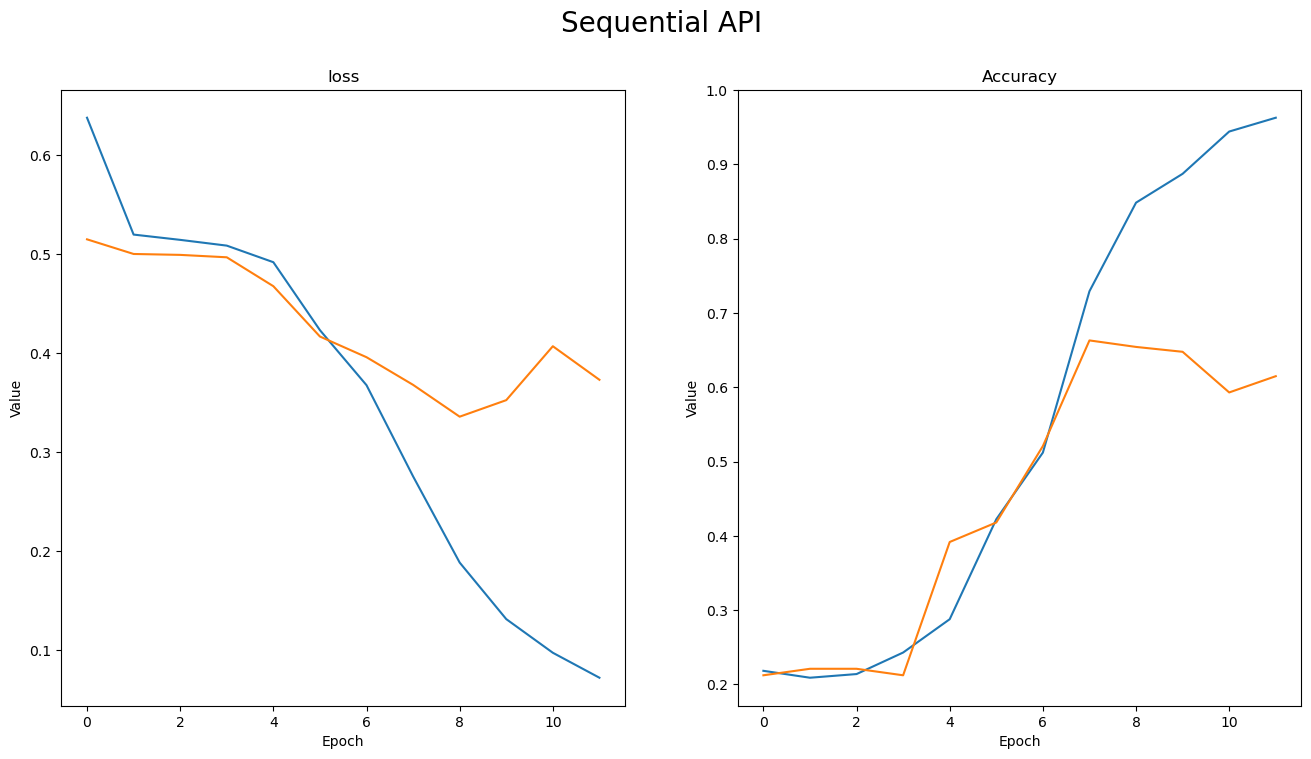

In [93]:
def plot_history(history_name):
    plt.figure(figsize=(16,8))
    plt.suptitle('Sequential API',fontsize=20)

    plt.subplot(1,2,1)
    plt.plot(history_name.history['loss'], label='Training Acc')
    plt.plot(history_name.history['val_loss'], label='Val Acc')
    plt.title('loss')
    plt.ylabel('Value') 
    plt.xlabel('Epoch')

    plt.subplot(1,2,2)
    plt.plot(history_name.history['accuracy'], label='Training Acc')
    plt.plot(history_name.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.ylabel('Value') 
    plt.xlabel('Epoch')


    plt.show()

plot_history(history)


In [94]:
url = f"https://buddyku.com/api/content/detail?content_id=f945fa19fbb1430aa1e3194114f310b6"
response = requests.get(url).content
content = json.loads(response)
data = content['values'][0]['content']

In [95]:
def inference(data):
    data = clean_text(data)
    data = tokenizer.texts_to_sequences([data])
    data = pad_sequences(data, maxlen=max_tokens)
    pred = model.predict(data)
    pred = np.argmax(pred,axis=1)
    
    return le.inverse_transform(pred)



In [96]:
inference(data)

1/1 [==============================] - 1s 548ms/step


array(['Teknologi'], dtype=object)

# Conclusion / Overall Analysis

### Model Performance
Based on our model performance, the model is overfit to the training data so we need to evaluate the model.